# <span style ='color:#74B72E'>Stock Market Analysis - Time Series 
## <span style ='color:#FCA510'> <bu>EXPLORATORY NOTEBOOK</bu>

- by Annie Carter
- Sourced by Yahoo Finance

![Image-3.png](https://images.theconversation.com/files/526640/original/file-20230516-23-zv2vps.jpg?ixlib=rb-1.1.0&rect=121%2C80%2C4372%2C2910&q=20&auto=format&w=320&fit=clip&dpr=2&usm=12&cs=strip)

 Custom Palette = Pear#74B72E, Fire #FCA510

In [46]:
from IPython.display import Image
#IMPORT LIBRARIES
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import timedelta, datetime

import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr



# import Machine Learning Library for classification
sklearn.model_selection.TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.stats import pearsonr, spearmanr

import datetime
import warnings
warnings.filterwarnings("ignore")


NameError: name 'sklearn' is not defined

## <span style ='color:#74B72E'>ACQUIRE

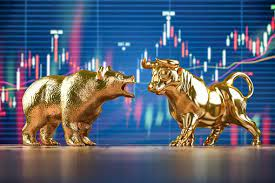

#### Acquired stock market data from Yahoo Finance for Nike, Coca-Cola, Boeing
- Downloaded stock csv. for last 5 years of daily stock market values
- Add Symbol column for each stock dataframe
- concated data frames by Symbol
- 8 columns, 1758 rows 
- Checked for nulls (0) and duplications (0)

In [2]:
# def prep_stocks():
#     ''' 
# The below functions prepares Nike, Coca-Cola, Boeing 
#     '''
# Save and read dataset csv from yahoo.finance.com
df_nke = pd.read_csv('NKE.csv')
# Read 'KO.csv' into another DataFrame
df_ko = pd.read_csv('KO.csv')
    # Read 'BA.csv' into another DataFrame
df_ba = pd.read_csv('BA.csv')   

In [5]:
df_nke.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2018-08-06,78.739998,79.580002,78.430000,79.510002,75.650772,4280600,NKE
1,2018-08-07,79.730003,80.629997,79.269997,80.529999,76.621254,5418900,NKE


In [4]:
df_nke['Symbol'] = 'NKE'

In [6]:
df_nke.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2018-08-06,78.739998,79.580002,78.430000,79.510002,75.650772,4280600,NKE
1,2018-08-07,79.730003,80.629997,79.269997,80.529999,76.621254,5418900,NKE


In [7]:
df_nke.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,112.425588,113.630684,111.180564,112.405811,109.891891,7.009522e+06
std,27.042625,27.198294,26.814730,26.988330,27.105668,3.783877e+06
min,64.790001,66.879997,60.000000,62.799999,60.881496,1.821900e+06
25%,88.007500,88.765001,87.222500,88.010002,84.972815,4.958600e+06
50%,108.279999,109.299999,107.194999,108.239998,107.520001,6.155000e+06
75%,132.577503,133.862495,130.872494,132.217502,129.588707,7.838875e+06
max,176.350006,179.100006,175.500000,177.509995,174.236038,4.817610e+07


In [8]:
df_ko.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-08,63.50,63.810001,62.750000,62.970001,61.135864,9165200
1,2022-08-09,63.18,63.310001,62.849998,63.049999,61.213531,7910900


In [9]:
df_ko['Symbol'] = 'KO'

In [10]:
df_ko.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,61.196880,61.570960,60.743640,61.153000,60.295011,1.322255e+07
std,2.226603,2.171012,2.264747,2.257399,2.354887,4.996666e+06
min,54.459999,54.959999,54.020000,54.389999,53.190765,5.165500e+06
25%,60.000000,60.349998,59.567501,59.905001,59.125231,1.010045e+07
50%,61.215000,61.530001,60.619999,61.170000,60.498348,1.260865e+07
75%,62.984999,63.245000,62.507499,62.899999,62.241542,1.487688e+07
max,65.209999,65.470001,64.959999,65.220001,63.814003,5.943220e+07


In [11]:
df_ba.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-08,166.410004,171.089996,164.710007,165.889999,165.889999,11293200
1,2022-08-09,166.509995,166.509995,163.449997,164.850006,164.850006,6064800


In [12]:
df_ba['Symbol'] = 'BA'

In [13]:
df_ba.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,189.020240,191.842800,186.691000,189.430520,189.430520,6.369866e+06
std,28.243819,28.175232,28.326868,28.365692,28.365692,3.190219e+06
min,122.000000,125.480003,120.989998,121.080002,121.080002,2.143000e+06
25%,169.292496,171.432495,167.100002,169.440002,169.440002,4.513075e+06
50%,201.535004,204.235001,199.029999,202.035004,202.035004,5.461100e+06
75%,210.112495,213.092499,207.862499,211.130001,211.130001,7.275000e+06
max,238.990005,243.100006,237.309998,238.850006,238.850006,2.940650e+07


##  <span style ='color:#74B72E'>PREPARE
- **Data Transformation:** Concat the 3 stock dataframes into 1 dataframe; convert 'Date' to DateTime
- **Handling Missing Values:** 0 nulls

- **Removing Duplicates:** 0 duplictes

- **Data Cleaning:** 0 outliers
- **Feature Selection:** Predicting Future Stock Values 'close'

![Image.png](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRxvlo2vR0tw3r_g4aTkbwSaOnHPJucvfIwuQ&usqp=CAU)

In [14]:
#this creates a variables containing both dataframes created above
frames = [df_nke, df_ko, df_ba]
 

In [15]:
#this creates a new dataframe using the above variable and combining both dataframes
df_stocks = pd.concat(frames)  
df_stocks.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
599,2020-12-21,144.820007,147.949997,142.509995,144.020004,140.560883,16111300,NKE
108,2023-01-11,62.380001,62.560001,61.410000,62.009998,61.072845,10823000,KO
130,2023-02-13,213.600006,216.360001,211.500000,215.649994,215.649994,5193300,BA
120,2019-01-29,80.360001,80.830002,79.839996,80.220001,76.741409,4187500,NKE
990,2022-07-13,101.940002,105.879997,101.559998,105.110001,103.849312,5299400,NKE


In [16]:
# Review shape to determine processing needs, will use sample size due to network restrictions for exploration
df_stocks.shape

(1758, 8)

In [17]:
#Review data to look at columns datatypes and nulls
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1758 entries, 0 to 249
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1758 non-null   object 
 1   Open       1758 non-null   float64
 2   High       1758 non-null   float64
 3   Low        1758 non-null   float64
 4   Close      1758 non-null   float64
 5   Adj Close  1758 non-null   float64
 6   Volume     1758 non-null   int64  
 7   Symbol     1758 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 123.6+ KB


In [18]:
# Quick review of data in columns started with 40 then transpose for readiability with head of 5
df_stocks.duplicated().value_counts()

False    1758
dtype: int64

In [19]:
df_stocks.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Symbol       0
dtype: int64

In [20]:
#Convert 'Date' into datetime dtype
df_stocks.Date = pd.to_datetime(df_stocks.Date)
df_stocks.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Symbol               object
dtype: object

In [21]:
#Make 'Date' column index of Dataframe
df_stocks = df_stocks.set_index('Date').sort_index()


In [23]:
#created sample DF with random state of 42 to review and clean data rapidly
df_stocks.head(2)


,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2018-08-06,78.739998,79.580002,78.430000,79.510002,75.650772,4280600,NKE
2018-08-07,79.730003,80.629997,79.269997,80.529999,76.621254,5418900,NKE


### <span style ='color:#FCA510'>PREPARATION FUNCTIONS FOR FINAL NOTEBOOK 

In [26]:
#Min date Aug 6 2018 - Aug 4 2023, 5 year lookback of stocks
df_stocks.index.min(), df_stocks.index.max()

(Timestamp('2018-08-06 00:00:00'), Timestamp('2023-08-04 00:00:00'))

In [28]:
df_stocks.resample('M').sum()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-31,1624.949998,1638.189994,1615.610007,1626.940011,1548.164726,107750300
2018-09-30,1577.499993,1592.410002,1568.560013,1580.800002,1507.776230,165674100
2018-10-31,1775.559997,1793.300011,1746.620011,1762.080015,1680.682190,199348500
2018-11-30,1570.289998,1588.639986,1550.659991,1570.569994,1498.231519,132667800
2018-12-31,1387.860008,1408.370004,1359.280001,1380.650001,1320.780692,180370600
...,...,...,...,...,...,...
2023-04-30,7517.179974,7587.970004,7448.069964,7525.789984,7508.947272,405487500
2023-05-31,8439.310002,8502.420006,8339.549987,8421.230004,8402.311292,559405700
2023-06-30,8030.670006,8116.609985,7950.810010,8039.680003,8034.768718,665642300


<Axes: xlabel='Date'>

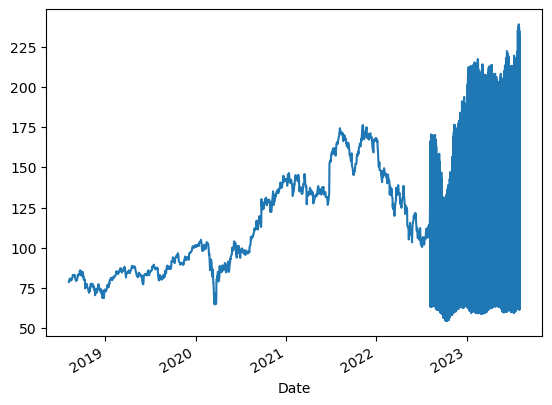

In [32]:
df_stocks.Open.plot()

<Axes: xlabel='Date'>

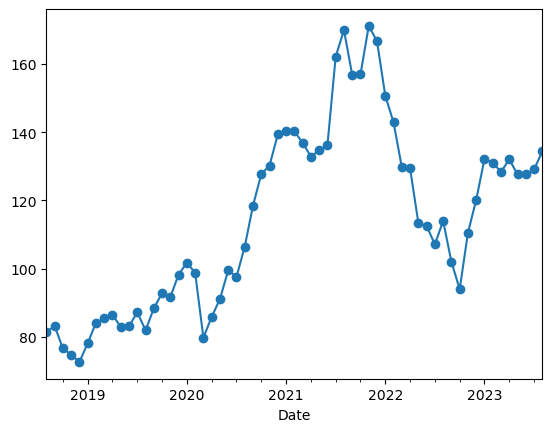

In [33]:
df_stocks.Close.resample('M').mean().plot(marker='o')

In [36]:
rolling_df = df_stocks.resample('W').mean().assign(
    rolling_3 = lambda df_stocks: df_stocks[df_stocks['Symbol'] == 'BA']['Close'].rolling(3).mean()
    rolling_3 = lambda df_stocks: df_stocks[df_stocks['Symbol'] == 'NKE']['Close'].rolling(3).mean()
    rolling_3 = lambda df_stocks: df_stocks[df_stocks['Symbol'] == 'KO']['Close'].rolling(3).mean()
    rolling_5 = lambda df_stocks: df_stocks[df_stocks['Symbol'] == 'BA']['Close'].rolling(5).mean()
    rolling_5 = lambda df_stocks: df_stocks[df_stocks['Symbol'] == 'NKE']['Close'].rolling(5).mean()
    rolling_5 = lambda df_stocks: df_stocks[df_stocks['Symbol'] == 'KO']['Close'].rolling(5).mean()
    rolling_7 = lambda df_stocks: df_stocks[df_stocks['Symbol'] == 'BA']['Close'].rolling(7).mean()
    rolling_7 = lambda df_stocks: df_stocks[df_stocks['Symbol'] == 'NKE']['Close'].rolling(7).mean()
    rolling_7 = lambda df_stocks: df_stocks[df_stocks['Symbol'] == 'KO']['Close'].rolling(7).mean()
   
)
rolling_df.plot()
rolling_df.head(20)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (922831715.py, line 2)

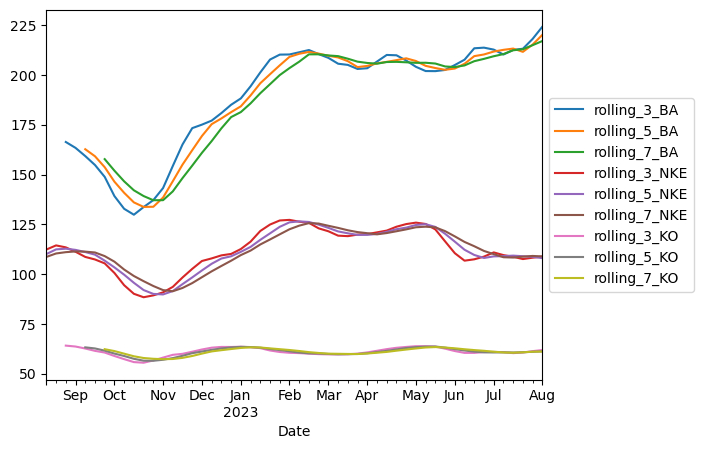

In [39]:
import pandas as pd

# Assuming df_stocks is your DataFrame with columns 'Symbol' and 'close'
# Assuming 'Date' column is the datetime index

# Group by 'Symbol' and resample to weekly frequency while calculating the mean
weekly_mean_df = df_stocks.groupby('Symbol').resample('W')['Close'].mean()

# Calculate rolling averages for 'BA', 'NKE', and 'KO' with window sizes of 3, 5, and 7 days
rolling_df = pd.DataFrame()
for symbol in ['BA', 'NKE', 'KO']:
    for window_size in [3, 5, 7]:
        rolling_avg = weekly_mean_df.loc[symbol].rolling(window_size).mean()
        column_name = f'rolling_{window_size}_{symbol}'
        rolling_df[column_name] = rolling_avg

# Plot the rolling averages
rolling_df.plot()
# Add legend and move it to the far right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

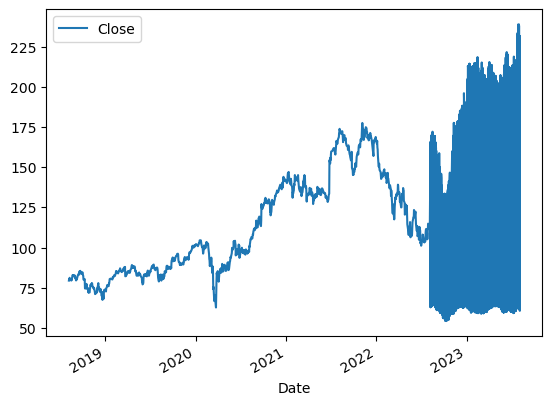

In [45]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)

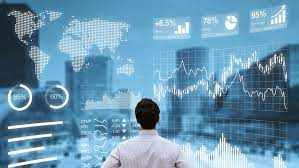

##  <span style ='color:#74B72E'>DATA SPLIT

In [ ]:
def split_sample(df):
    ''' The below functions were created in regression excercises and will be aggregated to make a master clean_data function for final 
        report
    '''
    train_validate, sample_test = train_test_split(df_sample, test_size=0.2, random_state=42)
    sample_train, sample_validate = train_test_split(train_validate, test_size=0.25, random_state=42)
    print(f'Train shape: {sample_train.shape}')
    print(f'Validate shape: {sample_validate.shape}')
    print(f'Test shape: {sample_test.shape}')
    return sample_train, sample_validate, sample_test 

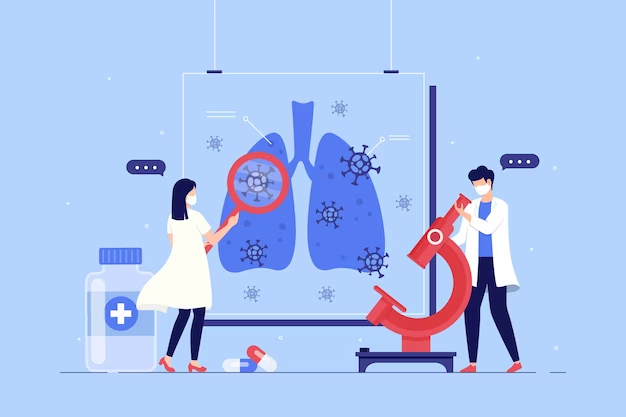

## <span style ='color:#FCA510'>BOEING TIME-SERIES FINDINGS

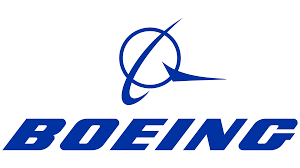

#### DATA VISUALIZATION FINDINGS :


## <span style ='color:#FCA510'>COCA-COLA TIMES-SERIES FINDINGS?

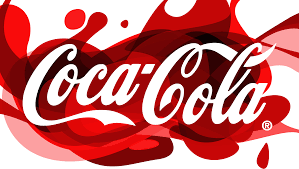

#### DATA VISUALIZATION FINDINGS :

## <span style ='color:#FCA510'>NIKE TIMES-SERIES FINDINGS?

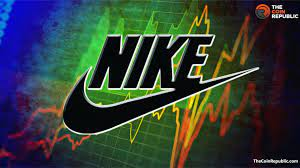

#### DATA VISUALIZATION FINDINGS :

#  <span style ='color:#74B72E'> TIME SERIES MODELING

## <span style ='color:#FCA510'>TRAIN

### <span style ='color:#757C88'> Last Observed Value

### <span style ='color:#757C88'>Simple Average

### <span style ='color:#757C88'>Moving Average

### <span style ='color:#757C88'>Previous Cycle

### <span style ='color:#757C88'>Holt's Linear Trend

### <span style ='color:#757C88'>Holt's Seasonal Trend

## <span style ='color:#FCA510'>VALIDATE
### <span style ='color:#757C88'> Last Observed Value
### <span style ='color:#757C88'>Simple Average
### <span style ='color:#757C88'>Moving Average
### <span style ='color:#757C88'>Previous Cycle
### <span style ='color:#757C88'>Holt's Linear Trend
### <span style ='color:#757C88'>Holt's Seasonal Trend


### TOP MODEL SELECTION: 

## <span style ='color:#FCA510'>TEST

## <span style ='color:#74B72E'> Findings: 
 The predictive models, including the Decision Tree Test Model, exhibited similar performance and closely aligned with the baseline accuracy of 76.21%. The Decision Tree Test Model showed a marginal improvement at 76.28%. Interestingly, all three models demonstrated consistency across train, validate, and test datasets. These results align with existing studies that suggest COPD rates in the US have remained relatively stable over time.

## <span style ='color:#241571'> NEXT STEPS



###  <span style ='color:#241571'> START OF NEXT STEPS
#### Time series 